In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras import layers, regularizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
pd.set_option('display.float','{:.2f}'.format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

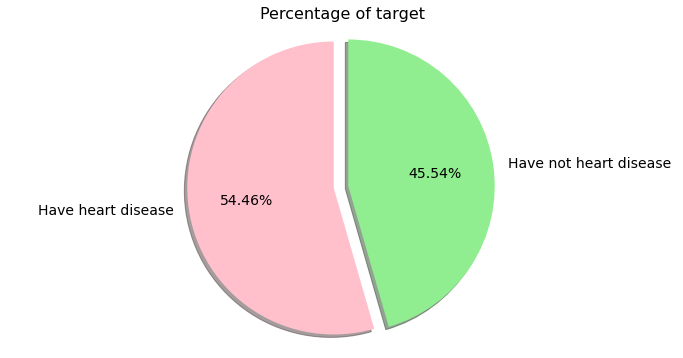

In [7]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

plt.figure(figsize=(12,6))

labels = 'Have heart disease','Have not heart disease'
sizes = [disease,no_disease]
explode = (0.1, 0) 
plt.pie(sizes, explode=explode, labels=labels, colors=['pink','lightgreen'],
autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('Percentage of target', size=16)
plt.show()

In [8]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [9]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Finding Co-Relations Between Factors

---This is to understand which columns affects the output

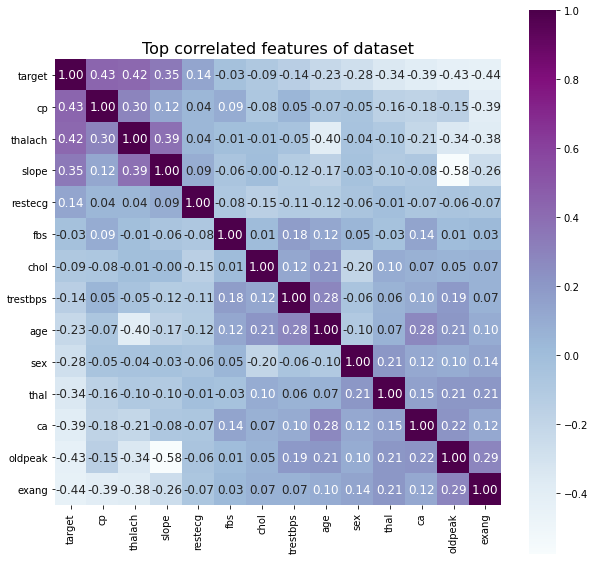

In [11]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='BuPu', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()

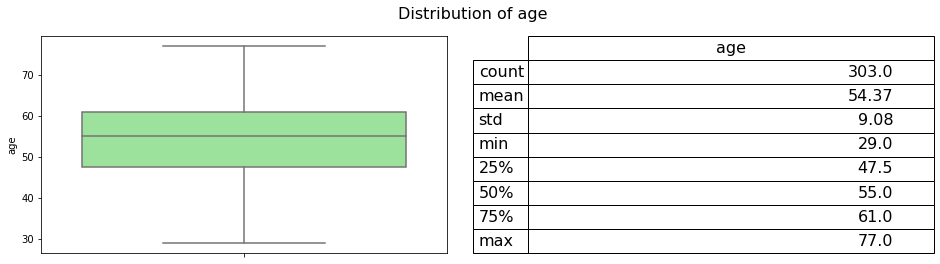

In [12]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(121)
sns.boxplot(y = df['age'], color='lightgreen')
describe = df['age'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of age', fontsize=16)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


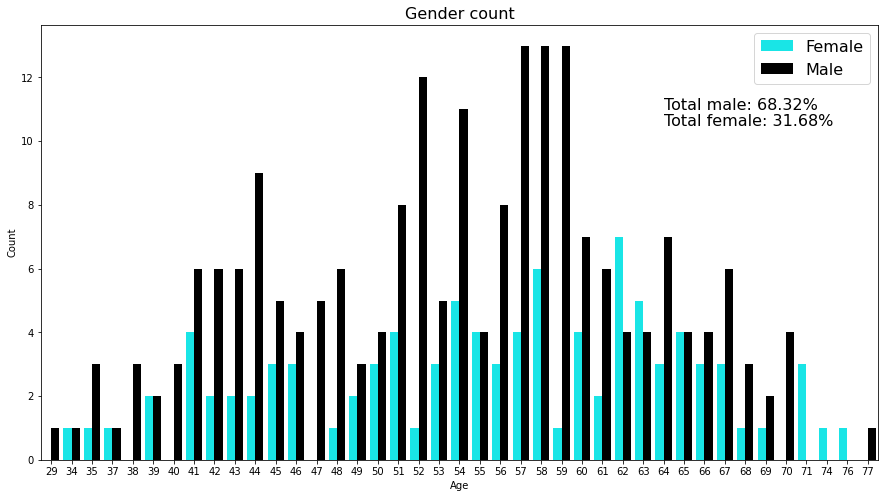

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(df['age'], hue=df['sex'], palette=['cyan','black'], saturation=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Gender count', fontsize=16)
plt.legend(loc='upper right', fontsize=16, labels=['Female', 'Male'])
plt.text(30, 11,'Total male: {:.2f}%'. 
         format(((df['sex'].value_counts()[1])/(len(df)))*100), fontsize=16)
plt.text(30, 10.5,'Total female: {:.2f}%'. 
         format(((df['sex'].value_counts()[0])/(len(df)))*100), fontsize=16)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


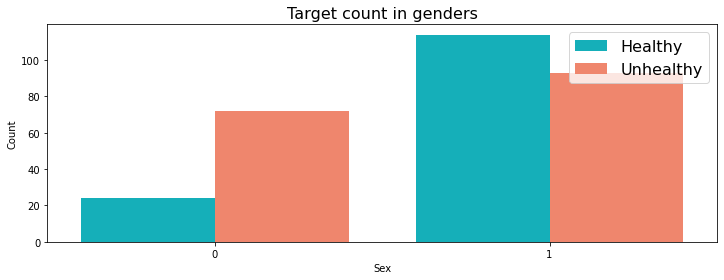

In [14]:
plt.figure(figsize=(12,4))
labels = ['female','male']
sns.countplot(df['sex'], hue=df['target'], palette=['#00c1ce','#ff7c5d'], saturation=0.8)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Target count in genders', fontsize=16)
plt.legend(loc='upper right', fontsize=16, labels=['Healthy', 'Unhealthy'])
plt.show()

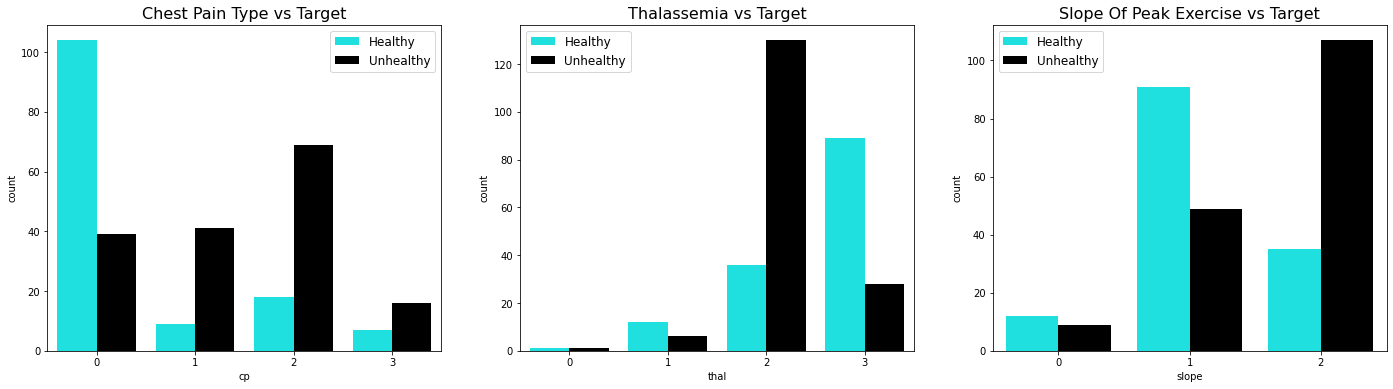

In [15]:
fig,ax=plt.subplots(figsize=(24,6))
palette = ['cyan','black']

plt.subplot(131)
x1=sns.countplot(x=df.cp,hue=df.target,palette=palette,linewidth=3)
x1.set_title('Chest Pain Type vs Target',size=16)
x1.legend(loc='upper right', fontsize=12, labels=['Healthy', 'Unhealthy'])

plt.subplot(132)
x2=sns.countplot(x=df.thal,hue=df.target,palette=palette,linewidth=3)
x2.set_title('Thalassemia vs Target',size=16)
x2.legend(loc='upper left', fontsize=12, labels=['Healthy', 'Unhealthy'])

plt.subplot(133)
x3=sns.countplot(x=df.slope,hue=df.target,palette=palette,linewidth=3)
x3.set_title('Slope Of Peak Exercise vs Target',size=16)
x3.legend(loc='upper left', fontsize=12, labels=['Healthy', 'Unhealthy'])

plt.show()

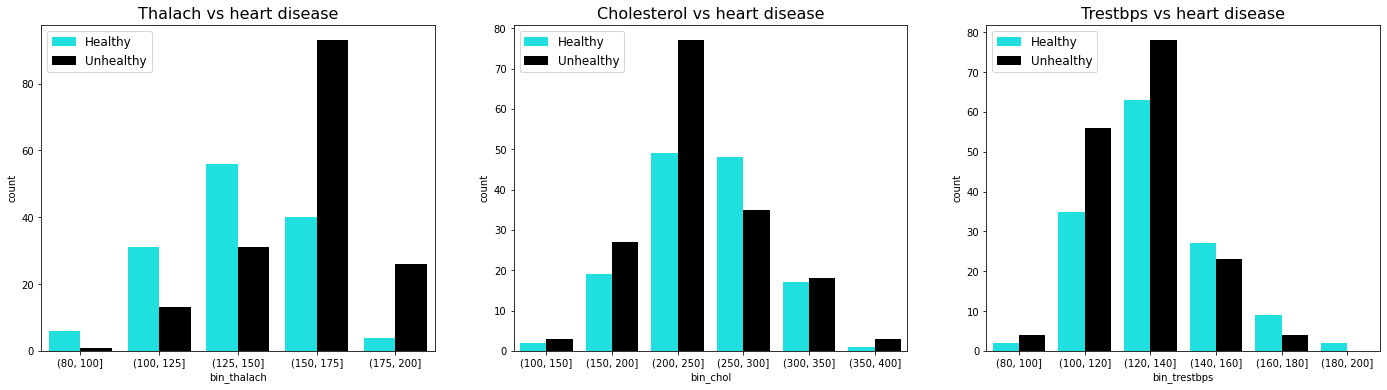

In [16]:
fig,ax=plt.subplots(figsize=(24,6))
palette = ['cyan','black']

plt.subplot(1, 3, 1)
df['bin_thalach']=pd.cut(df.thalach, bins=[80,100,125,150,175,200])
p1=sns.countplot(x=df.bin_thalach,hue=df.target,palette=palette,linewidth=3)
p1.set_title("Thalach vs heart disease",size=16)
p1.legend(loc='upper left', fontsize=12, labels=['Healthy', 'Unhealthy'])



plt.subplot(1, 3, 2)
df['bin_chol']=pd.cut(df.chol, bins=[100,150,200,250,300,350,400])
p2=sns.countplot(x=df.bin_chol,hue=df.target,palette=palette,linewidth=3)
p2.set_title("Cholesterol vs heart disease",size=16)
p2.legend(loc='upper left', fontsize=12, labels=['Healthy', 'Unhealthy'])



plt.subplot(1, 3, 3)
df['bin_trestbps']=pd.cut(df.trestbps, bins=[80,100,120,140,160,180,200])
p3=sns.countplot(x=df.bin_trestbps,hue=df.target,palette=palette,linewidth=3)
p3.set_title("Trestbps vs heart disease",size=16)
p3.legend(loc='upper left', fontsize=12, labels=['Healthy', 'Unhealthy'])



plt.show()

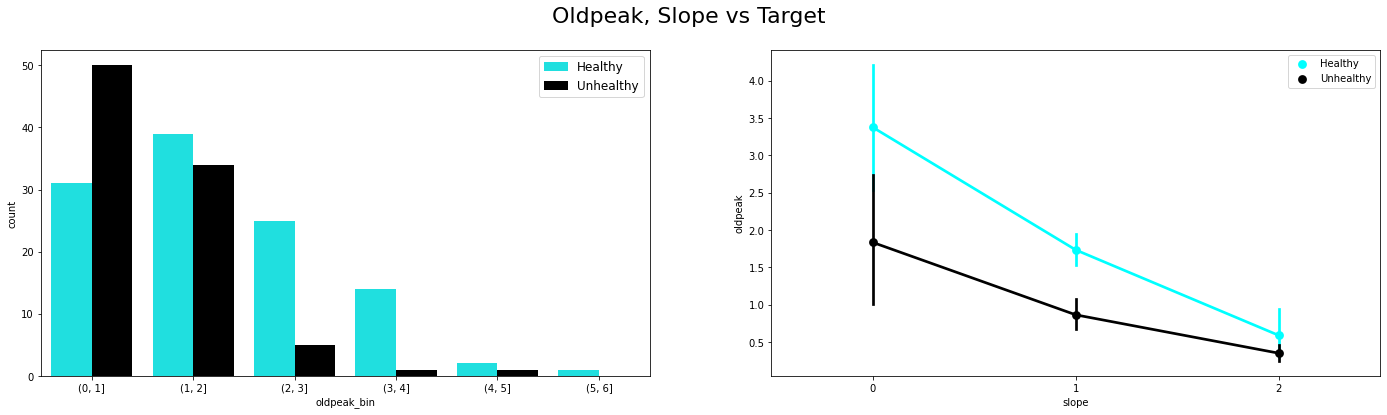

In [17]:
fig,ax=plt.subplots(figsize=(24,6))

plt.subplot(121)
old_bins = [0,1,2,3,4,5,6]
df['oldpeak_bin']=pd.cut(df.oldpeak, bins=old_bins)
o1=sns.countplot(x=df.oldpeak_bin,hue='target',data=df, palette=['cyan','black'])
o1.legend(loc='upper right', fontsize=12, labels=['Healthy', 'Unhealthy'])


plt.subplot(122)
o2 = sns.pointplot(x='slope',y='oldpeak',data=df,hue='target',palette=['cyan','black'])
handles = o2.get_legend_handles_labels()[0]
o2.legend(handles, ['Healthy', 'Unhealthy'])

plt.suptitle('Oldpeak, Slope vs Target', size = 22)
plt.show()

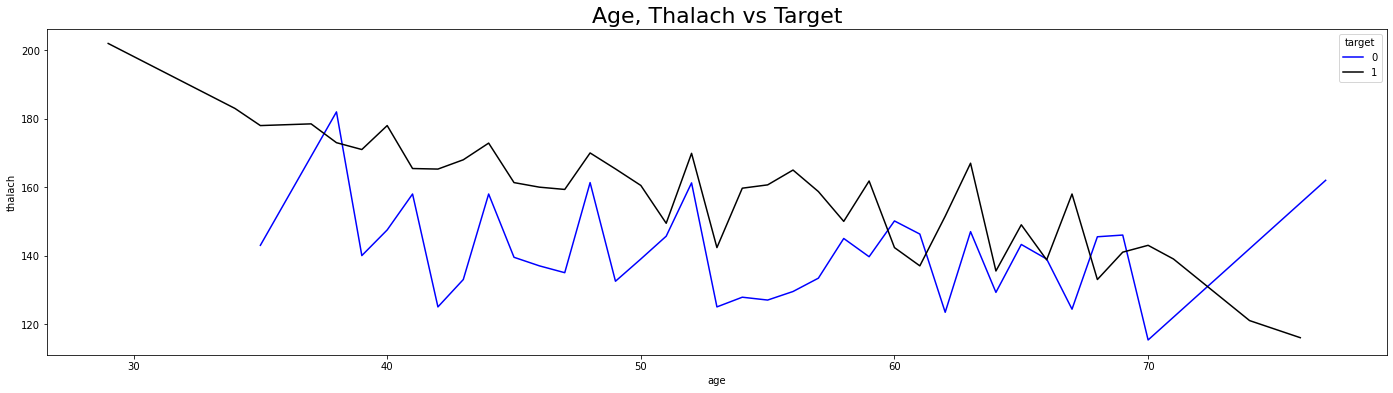

In [18]:
plt.figure(figsize=(24,6))
z1=sns.lineplot(x=df.age, y=df.thalach, hue=df.target, palette=['blue','black'], err_style=None)
plt.title('Age, Thalach vs Target',size=22)
plt.show()

In [19]:
#Dropping columns used only to plots.
df.drop(['bin_chol','bin_thalach','bin_trestbps','oldpeak_bin'],axis=1,inplace=True)

# Outlier Treatments

-- Here we are plotting a pairplot to understand which columns contains outliers



In [20]:
#sns.pairplot(data=df)

In [21]:
df[quantitative].head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.30
1,37,130,250,187,3.50
2,41,130,204,172,1.40
3,56,120,236,178,0.80
4,57,120,354,163,0.60


### Checking Outliers in those columns that contribute most towards the output



In [22]:
def iqr(data, column):
  Q1 = np.percentile(data[column], 25)
  Q3 = np.percentile(data[column], 75)
  IQR = Q3 - Q1
  outlier_step = 1.5 * IQR
  outliers_index = data[(data[column] < Q1 - outlier_step) | (data[column] > Q3 + outlier_step)].index
  return outliers_index

In [23]:
outliers_index = iqr(df,'trestbps')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
outliers_index = iqr(df,'chol')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [25]:
outliers_index = iqr(df,'thalach')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [26]:
outliers_index = iqr(df,'oldpeak')
df.drop(outliers_index, inplace=True)
df.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='cp', ylabel='target'>

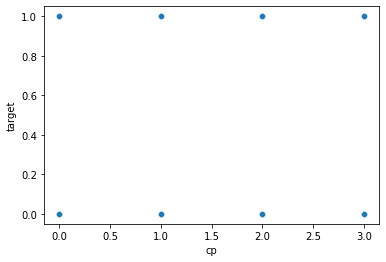

In [27]:
sns.scatterplot(x="cp", y="target", data=df)

<AxesSubplot:xlabel='oldpeak', ylabel='target'>

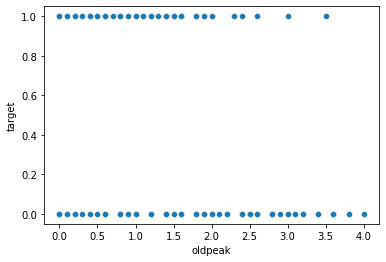

In [28]:
sns.scatterplot(x="oldpeak", y="target", data=df)

##### All outliers have been treated

for key in df.keys():
    df[key] = pd.to_numeric(df[key], errors='coerce')

df = df.dropna()

In [29]:
df.shape

(284, 14)

In [30]:
y=df['target']

In [31]:
x = df.drop('target',axis=1)

In [32]:
qualitative.remove('target')
x = pd.get_dummies(x, columns = qualitative)

In [33]:
x.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [34]:
x[quantitative] = StandardScaler().fit_transform(x[quantitative])

# Test Train & Validation Dataset

In [35]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [36]:
model = keras.Sequential([
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.4),
        layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1,activation='sigmoid')
])

In [37]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [38]:
print("Fit model on training data")
history = model.fit(x_train, y_train, batch_size=30, epochs=100, validation_split = 0.2, verbose=1)

Fit model on training data
Epoch 1/100
7/7 [==============================] - 3s 247ms/step - loss: 0.8241 - accuracy: 0.4777 - val_loss: 0.6955 - val_accuracy: 0.6304
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7695 - accuracy: 0.4758 - val_loss: 0.6676 - val_accuracy: 0.7826
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7267 - accuracy: 0.5708 - val_loss: 0.6454 - val_accuracy: 0.8261
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.7048 - accuracy: 0.6313 - val_loss: 0.6292 - val_accuracy: 0.8261
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: 0.6383 - val_loss: 0.6164 - val_accuracy: 0.8261
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6477 - accuracy: 0.7006 - val_loss: 0.6017 - val_accuracy: 0.7826
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6470 - accuracy: 0.6820 - val_loss: 0.5849 - val_accuracy:

Epoch 59/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4539 - accuracy: 0.8150 - val_loss: 0.3659 - val_accuracy: 0.8696
Epoch 60/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4039 - accuracy: 0.8593 - val_loss: 0.3687 - val_accuracy: 0.8696
Epoch 61/100
7/7 [==============================] - 0s 9ms/step - loss: 0.4274 - accuracy: 0.8649 - val_loss: 0.3688 - val_accuracy: 0.8696
Epoch 62/100
7/7 [==============================] - 0s 13ms/step - loss: 0.4363 - accuracy: 0.7990 - val_loss: 0.3684 - val_accuracy: 0.8696
Epoch 63/100
7/7 [==============================] - 0s 11ms/step - loss: 0.3749 - accuracy: 0.8071 - val_loss: 0.3677 - val_accuracy: 0.8696
Epoch 64/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4561 - accuracy: 0.8128 - val_loss: 0.3676 - val_accuracy: 0.8696
Epoch 65/100
7/7 [==============================] - 0s 11ms/step - loss: 0.3873 - accuracy: 0.8322 - val_loss: 0.3671 - val_accuracy: 0.8696
Epoch 66/100
7

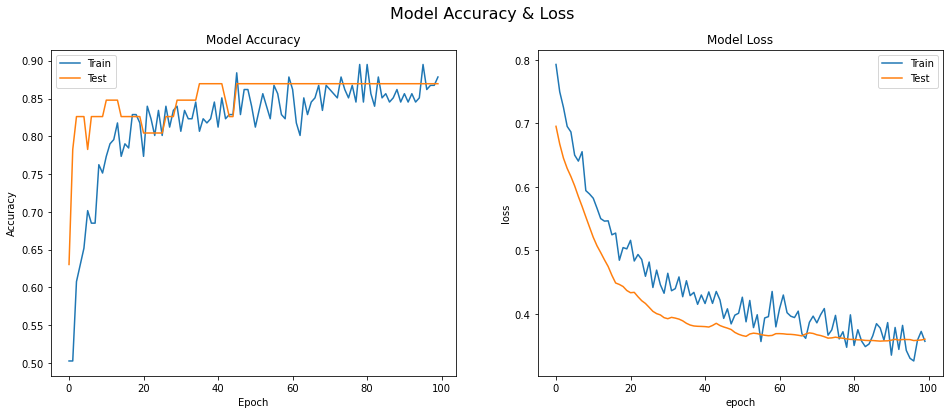

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['Train', 'Test'])
plt.suptitle("Model Accuracy & Loss",fontsize=16)

plt.show()

model.save('heart-predict.h5')

In [40]:
predict_test = model.predict_classes(x_test)
predict_train = model.predict_classes(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

In [41]:
acc_train = accuracy_score(y_train, predict_train)*100
acc_test = accuracy_score(y_test, predict_test)*100

print("Train Accuracy {:.2f}%".format(acc_train))
print("Test Accuracy {:.2f}%".format(acc_test))

Train Accuracy 86.34%
Test Accuracy 91.23%


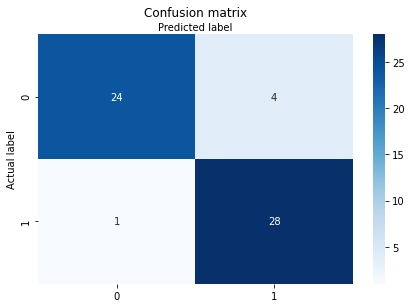

In [42]:
confusion_matrix = confusion_matrix(y_test,predict_test)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues',
           fmt = 'g')

ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
roc_auc_score(y_test, predict_test)

0.9113300492610839

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


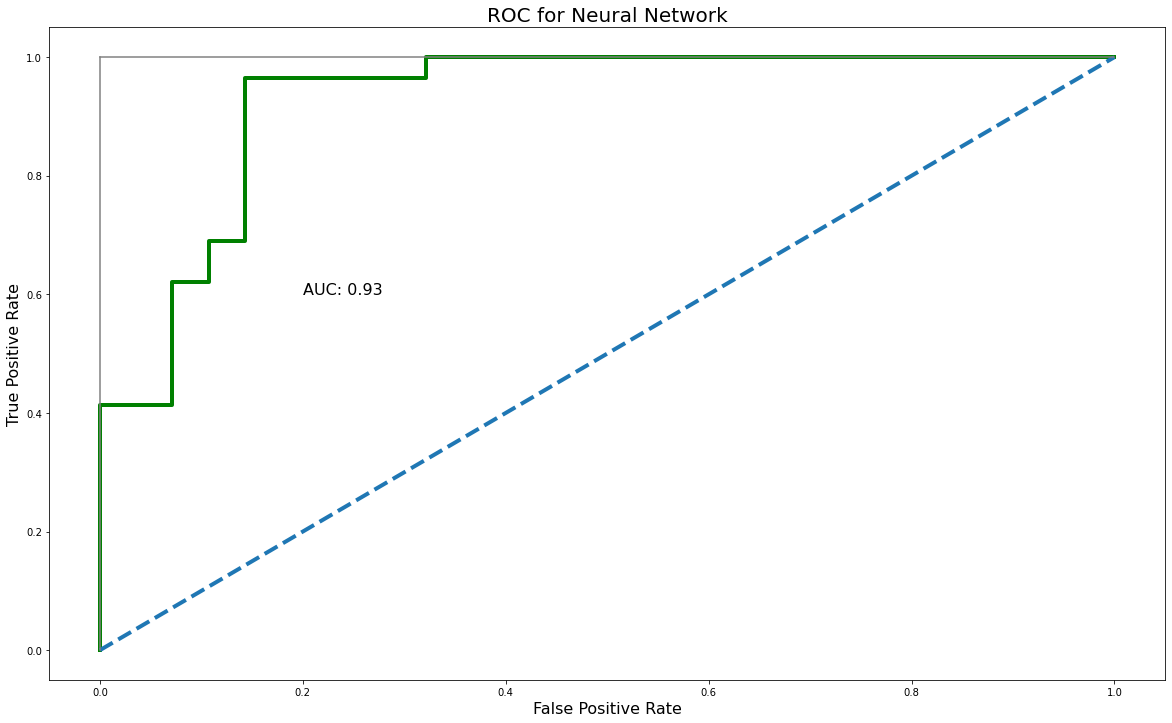

In [45]:
y_probabilities = model.predict_proba(x_test)

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)

#Plotting ROC Curve
plt.figure(figsize=(20,12))
plt.title('ROC for Neural Network', size=20)
plt.plot(false_positive_rate, true_positive_rate, linewidth=4, color='green')
plt.plot([0,1],ls='--',linewidth=4)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)
plt.show()

In [53]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 94 to 168
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        227 non-null    float64
 1   trestbps   227 non-null    float64
 2   chol       227 non-null    float64
 3   thalach    227 non-null    float64
 4   oldpeak    227 non-null    float64
 5   sex_0      227 non-null    uint8  
 6   sex_1      227 non-null    uint8  
 7   cp_0       227 non-null    uint8  
 8   cp_1       227 non-null    uint8  
 9   cp_2       227 non-null    uint8  
 10  cp_3       227 non-null    uint8  
 11  fbs_0      227 non-null    uint8  
 12  fbs_1      227 non-null    uint8  
 13  restecg_0  227 non-null    uint8  
 14  restecg_1  227 non-null    uint8  
 15  restecg_2  227 non-null    uint8  
 16  exang_0    227 non-null    uint8  
 17  exang_1    227 non-null    uint8  
 18  slope_0    227 non-null    uint8  
 19  slope_1    227 non-null    uint8  
 20  slope_2  

In [56]:
x_train.thal_0

AttributeError: 'DataFrame' object has no attribute 'thal_0'